In [15]:
import numpy as np
import matplotlib.pyplot as plt
from engine import Heatmap, Noise, colors, gradient
from noises import perlin

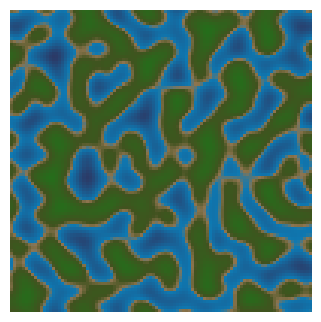

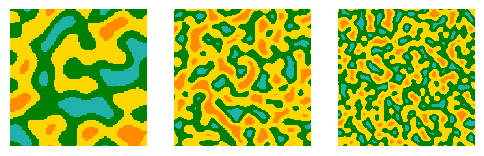

In [17]:
# Heatmap examples
Heatmap(perlin(10, 100), perlin(10, 100)**2, perlin(10, 100) + perlin(10, 100) + perlin(10, 100), scale = 1.5)
Heatmap(perlin(5, 20), perlin(10, 20), perlin(15, 20), cmap=colors(["darkorange", "gold", "green", "lightseagreen"]))

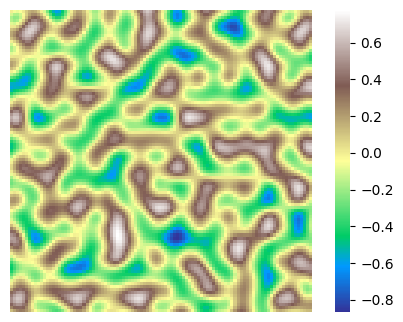

In [18]:
# Simplest noise rendering
Noise(perlin, distance = 10, resolution = 10)

# Restricted (start, end, step) and cbar is passed to heatmap:
Noise(perlin, distance = (1, 50, 3), resolution = (1, 50, 1), cbar = True)

In [19]:
# Voodoo
Heatmap(np.sin(perlin(15, 50) * 2*np.pi), np.cos(perlin(15, 50) * 2*np.pi), scale = 1.5)

interactive(children=(IntSlider(value=10, description='distance', max=30, min=-10), IntSlider(value=10, descri…

interactive(children=(IntSlider(value=25, description='distance', max=50, min=1, step=3), IntSlider(value=10, …